In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.neighbors import KNeighborsClassifier 


In [33]:
houses = pd.read_csv("Resources/preprocess_df.csv")

In [3]:
houses

,MSZoning_0,MSZoning_1,MSZoning_2,MSZoning_3,MSZoning_4,Street_0,Street_1,LotShape_0,LotShape_1,LotShape_2,...,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,SalePrice
0,0,0,0,1,0,0,1,0,0,0,...,8,0,2,548,0,61,0,0,0,208500
1,0,0,0,1,0,0,1,0,0,0,...,6,1,2,460,298,0,0,0,0,181500
2,0,0,0,1,0,0,1,1,0,0,...,6,1,2,608,0,42,0,0,0,223500
3,0,0,0,1,0,0,1,1,0,0,...,7,1,3,642,0,35,272,0,0,140000
4,0,0,0,1,0,0,1,1,0,0,...,9,1,3,836,192,84,0,0,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1407,0,0,0,1,0,0,1,0,0,0,...,7,1,2,460,0,40,0,0,0,175000
1408,0,0,0,1,0,0,1,0,0,0,...,7,2,2,500,349,0,0,0,0,210000
1409,0,0,0,1,0,0,1,0,0,0,...,9,2,1,252,0,60,0,0,0,266500
1410,0,0,0,1,0,0,1,0,0,0,...,5,0,1,240,366,0,112,0,0,142125


In [4]:
y = houses['SalePrice']

In [5]:
X = houses.drop('SalePrice', axis = 1)
X.head()

,MSZoning_0,MSZoning_1,MSZoning_2,MSZoning_3,MSZoning_4,Street_0,Street_1,LotShape_0,LotShape_1,LotShape_2,...,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch
0,0,0,0,1,0,0,1,0,0,0,...,1,8,0,2,548,0,61,0,0,0
1,0,0,0,1,0,0,1,0,0,0,...,1,6,1,2,460,298,0,0,0,0
2,0,0,0,1,0,0,1,1,0,0,...,1,6,1,2,608,0,42,0,0,0
3,0,0,0,1,0,0,1,1,0,0,...,1,7,1,3,642,0,35,272,0,0
4,0,0,0,1,0,0,1,1,0,0,...,1,9,1,3,836,192,84,0,0,0


In [6]:
 from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [7]:
X_train

,MSZoning_0,MSZoning_1,MSZoning_2,MSZoning_3,MSZoning_4,Street_0,Street_1,LotShape_0,LotShape_1,LotShape_2,...,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch
199,0,0,0,1,0,0,1,0,0,0,...,1,5,0,2,500,0,34,0,508,0
846,0,0,0,1,0,0,1,0,0,0,...,1,7,0,2,523,0,77,0,0,0
869,0,0,0,1,0,0,1,0,0,0,...,1,8,1,2,483,0,50,0,0,0
1363,0,0,0,1,0,0,1,0,0,0,...,1,6,0,2,622,0,45,0,0,0
394,0,0,0,1,0,0,1,0,0,0,...,1,8,0,1,308,0,0,160,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,0,0,0,1,0,0,1,1,0,0,...,1,7,1,2,460,100,38,0,0,0
1130,0,0,0,1,0,0,1,1,0,0,...,1,10,1,3,807,361,76,0,0,0
1294,0,0,0,1,0,0,1,0,0,0,...,1,5,0,4,480,0,0,0,0,0
860,0,1,0,0,0,0,1,1,0,0,...,1,5,1,2,506,97,65,0,0,0


In [24]:
from sklearn.preprocessing import minmax_scale


scale_list=['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch']

In [31]:
X_train[scale_list]=minmax_scale(X_train[scale_list])

C:\Users\Public\Downloads\Anaconda\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Public\Downloads\Anaconda\envs\PythonAdv\lib\site-packages\pandas\core\indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [36]:
X_test[scale_list]=minmax_scale(X_test[scale_list])

C:\Users\Public\Downloads\Anaconda\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Public\Downloads\Anaconda\envs\PythonAdv\lib\site-packages\pandas\core\indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [32]:
X_train

,MSZoning_0,MSZoning_1,MSZoning_2,MSZoning_3,MSZoning_4,Street_0,Street_1,LotShape_0,LotShape_1,LotShape_2,...,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch
199,0,0,0,1,0,0,1,0,0,0,...,0.0,0.222222,0.000000,0.50,0.359712,0.000000,0.062157,0.000000,1.0,0.0
846,0,0,0,1,0,0,1,0,0,0,...,0.0,0.444444,0.000000,0.50,0.376259,0.000000,0.140768,0.000000,0.0,0.0
869,0,0,0,1,0,0,1,0,0,0,...,0.0,0.555556,0.333333,0.50,0.347482,0.000000,0.091408,0.000000,0.0,0.0
1363,0,0,0,1,0,0,1,0,0,0,...,0.0,0.333333,0.000000,0.50,0.447482,0.000000,0.082267,0.000000,0.0,0.0
394,0,0,0,1,0,0,1,0,0,0,...,0.0,0.555556,0.000000,0.25,0.221583,0.000000,0.000000,0.289855,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,0,0,0,1,0,0,1,1,0,0,...,0.0,0.444444,0.333333,0.50,0.330935,0.135870,0.069470,0.000000,0.0,0.0
1130,0,0,0,1,0,0,1,1,0,0,...,0.0,0.777778,0.333333,0.75,0.580576,0.490489,0.138940,0.000000,0.0,0.0
1294,0,0,0,1,0,0,1,0,0,0,...,0.0,0.222222,0.000000,1.00,0.345324,0.000000,0.000000,0.000000,0.0,0.0
860,0,1,0,0,0,0,1,1,0,0,...,0.0,0.222222,0.333333,0.50,0.364029,0.131793,0.118830,0.000000,0.0,0.0


k: 1, Train/Test Score: 0.999/0.014
k: 3, Train/Test Score: 0.308/0.003
k: 5, Train/Test Score: 0.189/0.006
k: 7, Train/Test Score: 0.146/0.003
k: 9, Train/Test Score: 0.130/0.003
k: 11, Train/Test Score: 0.109/0.008
k: 13, Train/Test Score: 0.094/0.008
k: 15, Train/Test Score: 0.090/0.008
k: 17, Train/Test Score: 0.089/0.014
k: 19, Train/Test Score: 0.084/0.017
k: 21, Train/Test Score: 0.084/0.017
k: 23, Train/Test Score: 0.081/0.017
k: 25, Train/Test Score: 0.081/0.017
k: 27, Train/Test Score: 0.074/0.011
k: 29, Train/Test Score: 0.073/0.014
k: 31, Train/Test Score: 0.069/0.017
k: 33, Train/Test Score: 0.066/0.020
k: 35, Train/Test Score: 0.064/0.017
k: 37, Train/Test Score: 0.062/0.014
k: 39, Train/Test Score: 0.065/0.008
k: 41, Train/Test Score: 0.062/0.006
k: 43, Train/Test Score: 0.061/0.008
k: 45, Train/Test Score: 0.057/0.008
k: 47, Train/Test Score: 0.054/0.008
k: 49, Train/Test Score: 0.047/0.008
k: 51, Train/Test Score: 0.048/0.011
k: 53, Train/Test Score: 0.042/0.008
k: 55,

ValueError: x and y must have same first dimension, but have shapes (25,) and (150,)

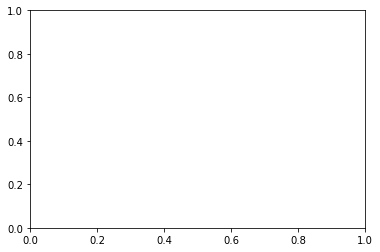

In [38]:
train_scores = []
test_scores = []
for k in range(1, 300, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    


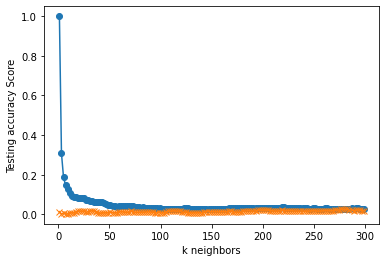

In [41]:
plt.plot(range(1, 300, 2), train_scores, marker='o')
plt.plot(range(1, 300, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [42]:
knn = KNeighborsClassifier(n_neighbors = 283)
knn.fit(X_train, y_train)
knn.score(X_test,y_test)

0.025495750708215296